In [1]:
from src import utils
from src import preprocessing
from src import processing
from src import deep_learning_module
import importlib
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
# from fastbook import *
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual

print(f"Versión de Python: {sys.version}")
print(f"Versión de Pandas: {pd.__version__}")

c:\Users\crist\miniconda3\envs\gpu_base\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\crist\miniconda3\envs\gpu_base\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
c:\Users\crist\miniconda3\envs\gpu_base\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Versión de Python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]
Versión de Pandas: 1.5.2


In [2]:
importlib.reload(utils)

df = utils.load_data(
                path_data="data/",
                name_csv_features="features.csv",
                name_csv_labels="labels.csv",
                delay=150,
                labeled_data_step=600000,
                )

In [3]:
importlib.reload(preprocessing)

data_arr = preprocessing.conver_datframe_to_numpy(
                        df,
                        columns=["X", "Y", "Z"],
                        debug=True,
                        )
                        
label_arr = preprocessing.conver_datframe_to_numpy(
                        df,
                        columns=["label"],
                        debug=True,
                        )

The columns are  (600000, 3)
The columns are  (600000, 1)


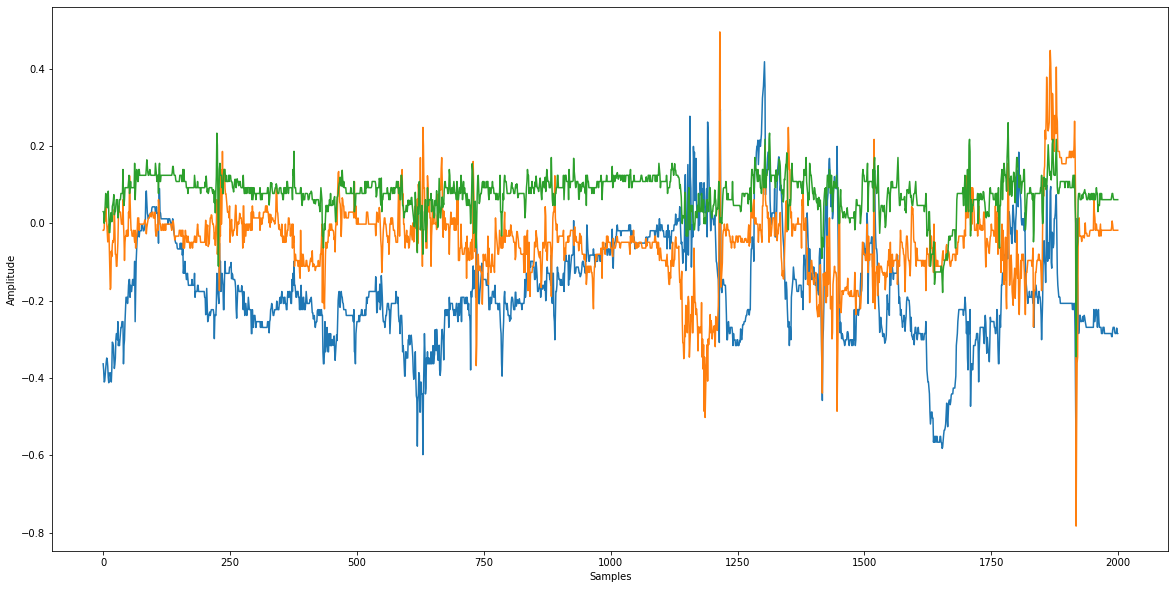

In [5]:
importlib.reload(preprocessing)
detrend = preprocessing.detrend_signal( signal = data_arr,
                                        type_detrend = "LINEAR"
                                        )

start = 5000
end = 7000
plt.figure(figsize=(20,10))
plt.plot(detrend[start:end])
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot();

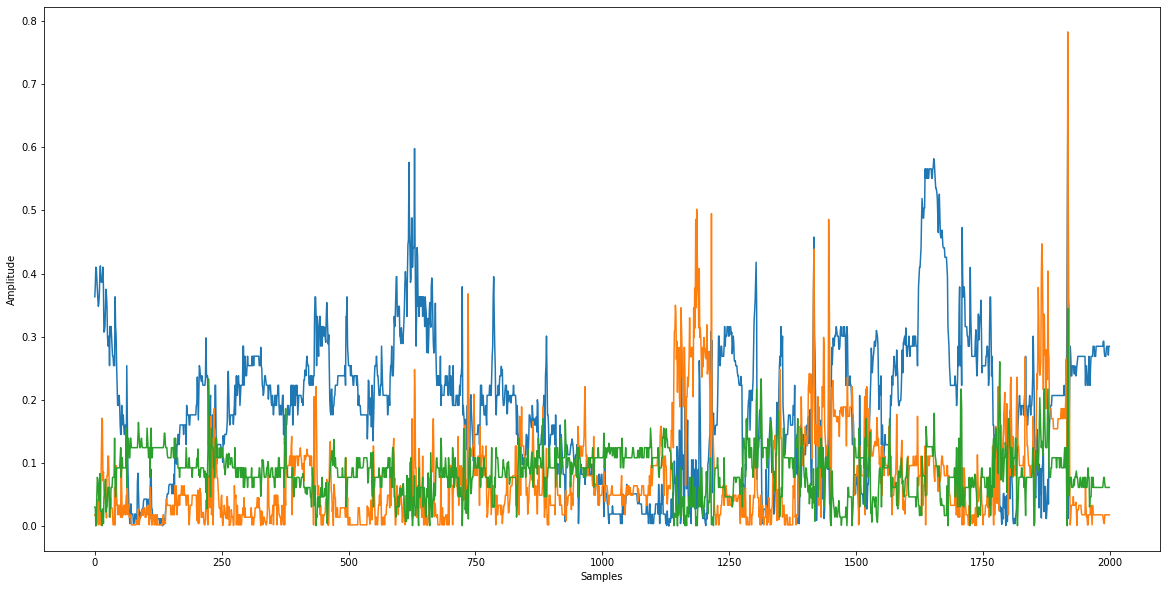

In [6]:
importlib.reload(preprocessing)
absolute_value = preprocessing.absolute_value(detrend)

start = 5000
end = 7000
plt.figure(figsize=(20,10))

plt.plot(absolute_value[start:end]);
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot();          

In [6]:
def graph_interact(start, end):
    """This function create a interactive graph with the data

    :param start: start point of the graph
    :type start: int
    :param end: end point of the graph
    :type end: int
    :param data: data to plot
    :type data: np.ndarray or pd.DataFrame
    """
    plt.figure(figsize=(20,10))
    plt.plot(absolute_value[start:end]);
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.plot();
    return
interact(graph_interact, start=0, end=6000)

interactive(children=(IntSlider(value=0, description='start', max=1), IntSlider(value=6000, description='end',…

<function __main__.graph_interact(start, end)>

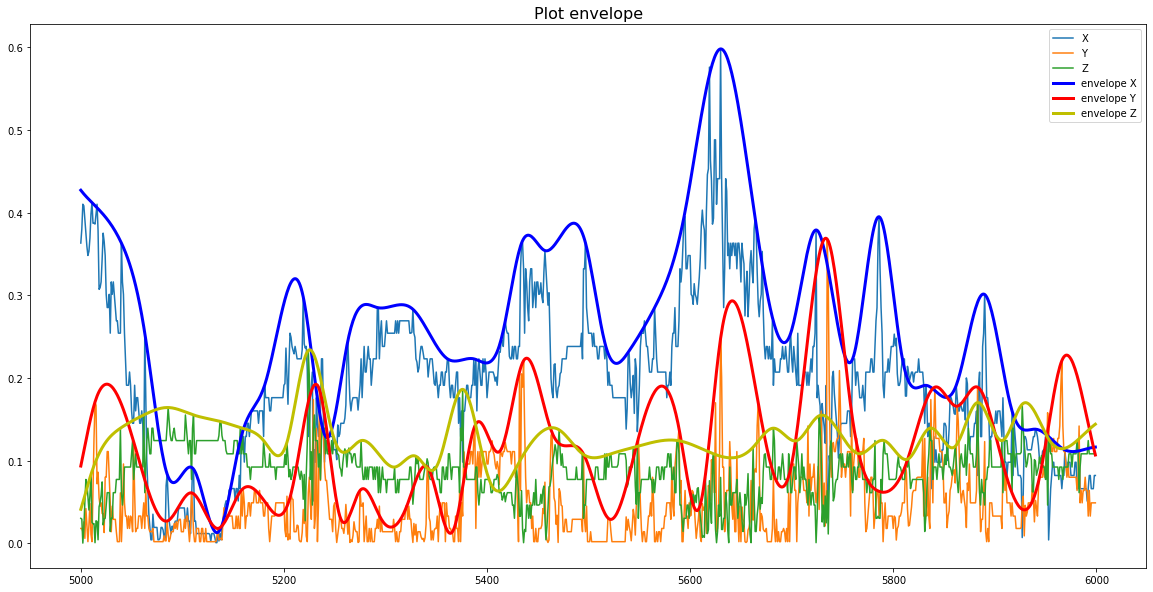

In [7]:
# Parameter interpolation ----------------------------------------------
interpolation = 20

importlib.reload(preprocessing)
data_eng = preprocessing.envelope(
                                    data = absolute_value,
                                    distance=interpolation
                                    )
# data_eng[1].shape

# auxiliar variable for visualization

a = preprocessing.envelope_aux(absolute_value, interpolation)
x = np.arange(len(data_arr))

# Visualization interpolation  ----------------------------------------------
graph = True
start = 5000
end = 6000
if graph:
    # plot a
    plt.figure(figsize=(20,10))
    plt.title('Plot envelope',fontsize=16)
    plt.plot(x[start:end], absolute_value[start:end], label='envelope')
    plt.plot(x[start:end], a[0][start:end],color='b',linewidth=3)   
    plt.plot(x[start:end], a[1][start:end],color='r',linewidth=3)
    plt.plot(x[start:end], a[2][start:end],color='y',linewidth=3)
    # plt.plot(x[start:end], label_arr[start:end],color='black',linewidth=3)
    # legend column 1 is X, column 2 is Y, column 3 is Z
    plt.legend(['X', 'Y', 'Z','envelope X', 'envelope Y', 'envelope Z', 'label'], loc='upper right')
    plt.show()

In [8]:
# importlib.reload(utils)
# # Data engineering ----------------------------------------------
# names_new_columns = [f'x_env_{interpolation}',f'y_env_{interpolation}',f'z_env_{interpolation}']
# new_df = utils.arr_to_dataframe(data_eng, df, names_new_columns)
# new_df.head()

In [9]:
# optional
# new_df.to_csv(f'data/features_eng_{interpolation}.csv', index=False) 

In [8]:
# red features_eng_*.csv
df_25 = pd.read_csv('data/features_eng_25.csv')
df_50 = pd.read_csv('data/features_eng_50.csv')
df_10 = pd.read_csv('data/features_eng_10.csv')

# df_50.head()
drop_columns = ['X', 'Y', 'Z', 'label']
df_10.drop(drop_columns, axis=1, inplace=True)
df_25.drop(drop_columns, axis=1, inplace=True)
df_50.drop(drop_columns, axis=1, inplace=True)

concat_df = pd.concat([df_10, df_25, df_50, df], axis=1)

concat_df_columns = concat_df.columns[:-1]

In [10]:
concat_df.head(1)

,x_env_10,y_env_10,z_env_10,x_env_25,y_env_25,z_env_25,x_env_50,y_env_50,z_env_50,X,Y,Z,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.062,-0.25,0.0,0


In [12]:
from src import preprocessing
import importlib
import seaborn as sns
import warnings

importlib.reload(preprocessing)
columns_scale = concat_df_columns
columns_labels = ["label"]
df_sc = preprocessing.normalize_data( concat_df,
                        columns_scale=columns_scale, 
                        columns_no_scale=columns_labels, 
                        is_dataframe=True, 
                        type_normalization="MinMaxScaler"
                        )


In [13]:
df_sc.head(1)

,label,x_env_10,y_env_10,z_env_10,x_env_25,y_env_25,z_env_25,x_env_50,y_env_50,z_env_50,X,Y,Z
0,0,0.1963,0.207526,0.23915,0.118924,0.151711,0.219126,0.133975,0.119918,0.202708,0.502462,0.463158,0.757938


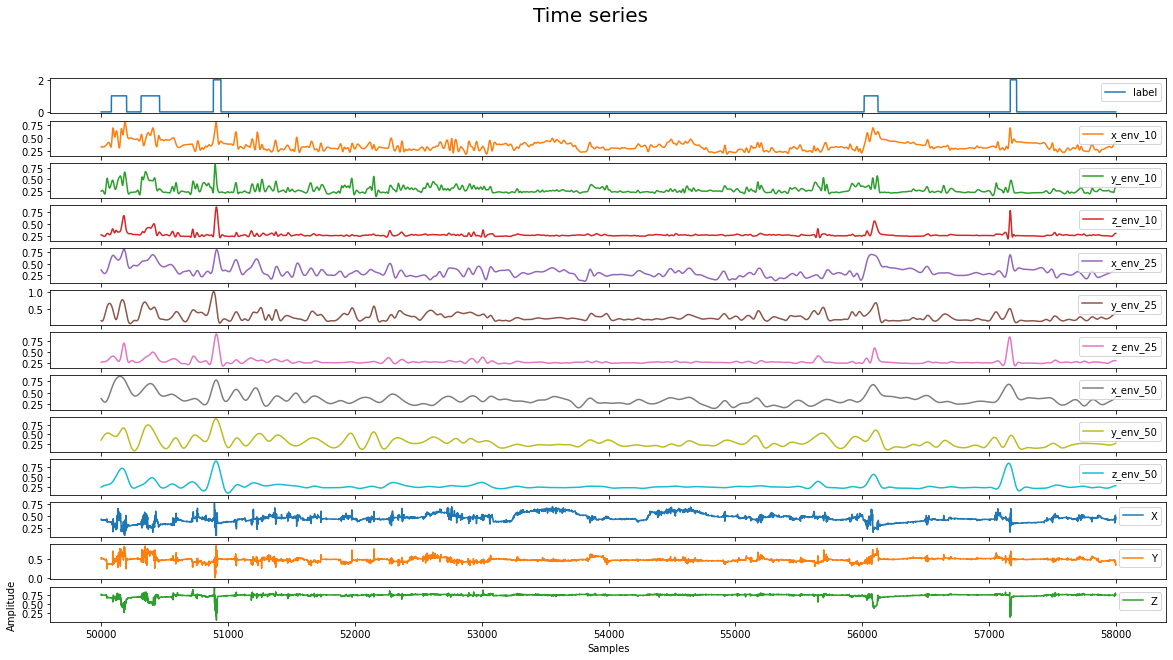

In [16]:
start = 50000
end = 58000
graph_size = (20,10)
df_sc[start:end].plot(subplots=True, figsize=graph_size)
# set title
plt.suptitle('Time series', fontsize=20)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

In [15]:
importlib.reload(preprocessing)
importlib.reload(utils)

# Data processing ------------------------------------------- True False
interpolation = 20
balanced = True 
debug = True
# type_model = ["cnn", "rnn", "lstm", "gru"]


data_splited = preprocessing.split_windows(
                                                        df_sc, 
                                                        width_windows = 20, 
                                                        stride_windows =20,
                                                        balanced=balanced, 
                                                        debug=debug
                                                        )


try:
    arr_0, arr_1, arr_2, min_class = data_splited
    print("Using balanced data")
except:
    df_list = data_splited
    print("Using unbalanced data")

if balanced:
    # # generate labels data ----------------------------------------------
    y_train_0, y_train_1, y_train_2 = utils.create_labels(min_class, debug=debug)
    # # split data --------------------------------------------------------
    X_train, X_test, y_train, y_test = processing.split_data(
                            (arr_0, arr_1, arr_2), 
                            (y_train_0, y_train_1, y_train_2), 
                            debug=debug
                            )

else:
    # split data zip, the first element is the data and the second is the labels
    x_train, y_train = zip(*df_list)
    # split data to test and train
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    # convert to np.array
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)


--------------------Numbers of windows per class---------------------
Number of windows with normal behavior :  29278 
Number of windows with reproductive event :   229 
Number of windows with event of interest :   493 


The minimum number of windows per class is :  229 


----Numbers of windows per class before balanced data-----
Number of windows with normal behavior :  229 
Number of windows with reproductive event :   229 
Number of windows with event of interest :   229 


-----------before balanced----------------
Number of windows with normal behavior :  229 
Number of windows with reproductive event :   229 
Number of windows with event of interest :   229 



 Number of windows with normal behavior :  229 
 The shape of each window is :  (20, 12) 
 The shape of the array is :  (229, 20, 12) 
 The type of each window is :  <class 'numpy.ndarray'> 



 Number of windows with reproductive event :  229 
 The shape of each window is :  (20, 12) 
 The shape of the array is :  (229,

In [15]:
importlib.reload(deep_learning_module)

# # reshape data --------------------------------------------------------
num_classes = 3 #cantidad de clases
cnn = True

if cnn:

# # reshape data --------------------------------------------------------
    num_classes = 3 
    input_shape_dataset = (X_train.shape[1], X_train.shape[2], 1)
    print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
    print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

    X_train, X_test = deep_learning_module.reshape_data_cnn(X_train, X_test, debug=False)

    print(f"x_train reshape: {X_train.shape} - y_train reshape: {y_train.shape}")
    print(f"x_test reshape: {X_test.shape} - y_test reshape: {y_test.shape}")
else:
    print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
    print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (549, 20, 12) - y_train shape: (549,)
x_test shape: (138, 20, 12) - y_test shape: (138,)
x_train reshape: (549, 20, 12, 1) - y_train reshape: (549,)
x_test reshape: (138, 20, 12, 1) - y_test reshape: (138,)


In [16]:
import os
os.environ['TF_XLA_FLAGS'] = '--tf_xla_cpu_global_jit'


In [17]:
import warnings
warnings.filterwarnings("ignore")


------------model summary---------------
input_shape_dataset (20, 12, 1)
num_classes 3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 12, 8)         248       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 1, 16)         1552      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 1, 16)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 1, 16)         272       
                                   

INFO:tensorflow:Assets written to: C:\Users\crist\AppData\Local\Temp\tmpt2ni2wcf\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\crist\AppData\Local\Temp\tmpt2ni2wcf\model\data\model\assets


5/5 [==============================] - 0s 2ms/step
run_id: 3c1cf5c3a9144ab6810a7dbaa9935ac9
artifacts_uri: file:///C:/Users/crist/Documents/Biology/QLA002%20Panchito/V2/mlruns/0/3c1cf5c3a9144ab6810a7dbaa9935ac9/artifacts


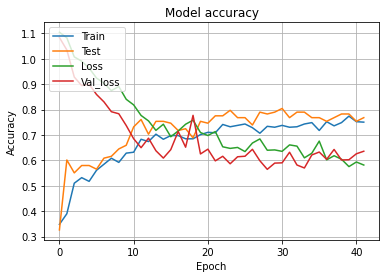

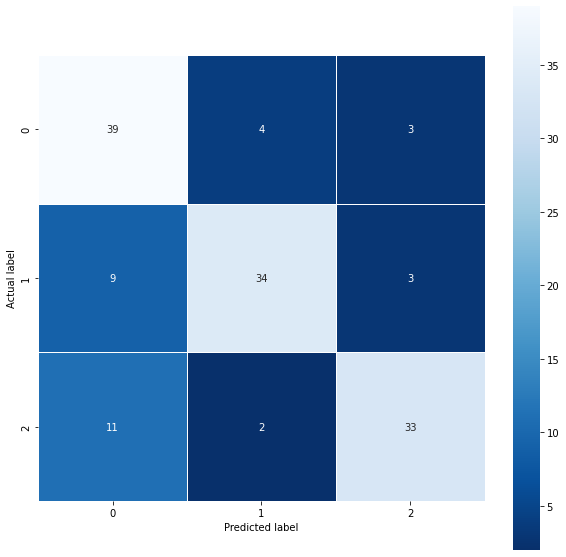

In [18]:
importlib.reload(deep_learning_module)
history = deep_learning_module.run_experiment_cnn(  input_shape_dataset,
                                                    X_train, 
                                                    y_train, 
                                                    X_test, 
                                                    y_test,
                                                    experiment_name = 'CNN_test_1',
                                                    epochs=42, 
                                                    # batch_size=8, 
                                                    debug=True,
                                                    learning_rate=0.001,
                                                    metrics = ['accuracy'],
                                                    num_classes = 3,
                                                    loss = 'sparse_categorical_crossentropy',
                                                    filters_cnn_base = [8, 16, 16],
                                                    kernel_size_cnn_base = [(10,3), (1,12), (1,1)],
                                                    pool_size_cnn_base = [(1,1), (1,1), (1,1)],
                                                    dropout_rate=[(0.2),(0.4),(0.6)],
                                                    num_units_dense_base=[128, 64],
                                                    padding_exp='same',
                                                    )



In [19]:
importlib.reload(preprocessing)
importlib.reload(utils)

# Data processing ------------------------------------------- True False
interpolation = 20
balanced = False 
debug = False
# type_model = ["cnn", "rnn", "lstm", "gru"]


data_splited = preprocessing.split_windows(
                                                        df_sc, 
                                                        width_windows = 20, 
                                                        stride_windows =20,
                                                        balanced=balanced, 
                                                        debug=debug
                                                        )


try:
    arr_0, arr_1, arr_2, min_class = data_splited
    print("Using balanced data")
except:
    df_list = data_splited
    print("Using unbalanced data")

if balanced:
    # # generate labels data ----------------------------------------------
    y_train_0, y_train_1, y_train_2 = utils.create_labels(min_class, debug=debug)
    # # split data --------------------------------------------------------
    X_train, X_test, y_train, y_test = processing.split_data(
                            (arr_0, arr_1, arr_2), 
                            (y_train_0, y_train_1, y_train_2), 
                            debug=debug
                            )

else:
    # split data zip, the first element is the data and the second is the labels
    x_train, y_train = zip(*df_list)
    # split data to test and train
    X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
    # convert to np.array
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)


Using unbalanced data


In [20]:
importlib.reload(deep_learning_module)

# # reshape data --------------------------------------------------------
num_classes = 3 #cantidad de clases
cnn = False

if cnn:

# # reshape data --------------------------------------------------------
    num_classes = 3 
    input_shape_dataset = (X_train.shape[1], X_train.shape[2], 1)    
    print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
    print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

    X_train, X_test = deep_learning_module.reshape_data_cnn(X_train, X_test, debug=False)

    print(f"x_train reshape: {X_train.shape} - y_train reshape: {y_train.shape}")
    print(f"x_test reshape: {X_test.shape} - y_test reshape: {y_test.shape}")
else:

    input_shape_dataset = (X_train.shape[1], X_train.shape[2])    

    print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
    print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (24000, 20, 12) - y_train shape: (24000,)
x_test shape: (6000, 20, 12) - y_test shape: (6000,)


In [21]:
X_train[1][1]

array([0.34456856, 0.25569879, 0.25638928, 0.33449429, 0.230757  ,
       0.24218091, 0.31981454, 0.21192557, 0.24737351, 0.40863018,
       0.47534626, 0.7493015 ])

In [22]:
y_train[1]

0

In [23]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (24000, 20, 12) - y_train shape: (24000, 3)
x_test shape: (6000, 20, 12) - y_test shape: (6000, 3)


In [25]:
input_shape_dataset

(20, 12)

In [28]:
from keras.callbacks import Callback
import sys

class ProgressCallback(Callback):
    def __init__(self, epochs):
        self.epochs = epochs

    def on_train_begin(self, logs={}):
        self.seen = 0

    def on_epoch_end(self, epoch, logs={}):
        self.seen += logs.get('size', 0)
        # Calcula el porcentaje de progreso
        progress = self.seen / (X_train.shape[0] * self.epochs) * 100
        # Imprime la barra de progreso personalizada
        sys.stdout.write('\rEpoch {}/{} [{}]'.format(epoch + 1, self.epochs, '#' * int(progress/10)))


------------model summary---------------
input_shape_dataset (20, 12)
num_classes 3
Epoch 5/5 []

INFO:tensorflow:Assets written to: C:\Users\crist\AppData\Local\Temp\tmp64igo6tz\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\crist\AppData\Local\Temp\tmp64igo6tz\model\data\model\assets


188/188 [==============================] - 1s 3ms/step
run_id: cc9af7c38b7c4d6b9944e1f9fd5902f6
artifacts_uri: file:///C:/Users/crist/Documents/Biology/QLA002%20Panchito/V2/mlruns/381449821454800890/cc9af7c38b7c4d6b9944e1f9fd5902f6/artifacts


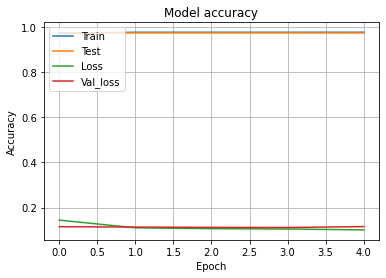

In [37]:
importlib.reload(deep_learning_module)
history = deep_learning_module.run_experiment_rnn(  input_shape_dataset,
                                                    X_train,
                                                    y_train,
                                                    X_test,
                                                    y_test,
                                                    experiment_name = 'RNN_test_1',
                                                    epochs=5,
                                                    # batch_size=8,
                                                    debug=True,
                                                    learning_rate=0.001,
                                                    metrics = ["accuracy"],
                                                    num_classes = 3,
                                                    loss = 'categorical_crossentropy',
                                                    num_units_lstm_base = 40,
                                                    num_units_dense_base = 40,
                                                    dropout_rate = 0.2,
                                                    )


In [ ]:
print(f"x_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape} - y_test shape: {y_test.shape}")

x_train shape: (24000, 20, 12) - y_train shape: (24000, 3)
x_test shape: (6000, 20, 12) - y_test shape: (6000, 3)


In [ ]:
y_test[1]

array([1., 0., 0.], dtype=float32)

In [ ]:
X_train.shape

(24000, 20, 12)

In [ ]:
for i in range(len(X_train)):
    if X_train[i].shape != (20, 12):
        print(X_train[i].shape)

In [ ]:
shape=X_train.shape[-2:]
shape

(20, 12)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(40, input_shape=(20, 12)))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 40)                8480      
                                                                 
 dropout_46 (Dropout)        (None, 40)                0         
                                                                 
 dense_50 (Dense)            (None, 40)                1640      
                                                                 
 dense_51 (Dense)            (None, 3)                 123       
                                                                 
Total params: 10,243
Trainable params: 10,243
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
750/750 [==============================] - 8s 9ms/step - loss: 0.1285 - accuracy: 0.9746 - val_loss: 0.1160 - val_accuracy: 0.9737
Epoch 2/3
750/750 [==============================] - 6s 8ms/step - loss: 0.1056 - accuracy: 0.9765 - val_loss: 0.1110 - val_accuracy: 0.9737
Epoch 3/3
750/750 [==============================] - 6s 8ms/step - loss: 0.1003 - accuracy: 0.9765 - val_loss: 0.1081 - val_accuracy: 0.9737
